In [121]:
#importing dependencies
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [2]:
#loading data (numpy array)
array_X = np.load(r"C:\Users\MASTER\Sign_Language_Classification\X.npy")
array_y = np.load(r"C:\Users\MASTER\Sign_Language_Classification\Y.npy")

In [3]:
#first element in array_X
array_X[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

In [4]:
#first element in array_y
array_y[0]
#array_y is a sparse matrix

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
#checking shape  of array_y
array_X.shape, array_y.shape

((2062, 64, 64), (2062, 10))

(-0.5, 63.5, 63.5, -0.5)

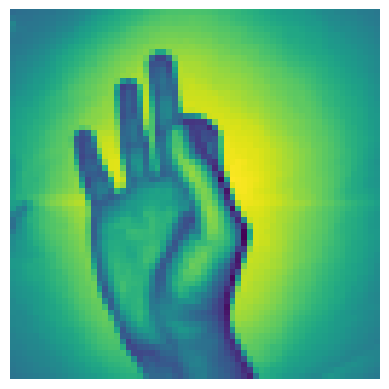

In [130]:
#plotting the first image in array_X
img_size = 64
plt.imshow(array_X[0])
plt.axis("off")

In [9]:
#rearranging array_X to match with array_y
X = np.concatenate((array_X[204:409,:],
            array_X[822:1028,:],
            array_X[1649:1855,:],
            array_X[1443:1649,:],
            array_X[1236:1443,:],
            array_X[1855:2062,:],
            array_X[615:822,:],
            array_X[409:615,:],
            array_X[1028:1236,:],
            array_X[0:204,:]),axis = 0)

In [10]:
#extracting class labels from array_y(sparse matrix)
y = np.argmax(array_y, axis = 1)
y

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

<AxesSubplot: >

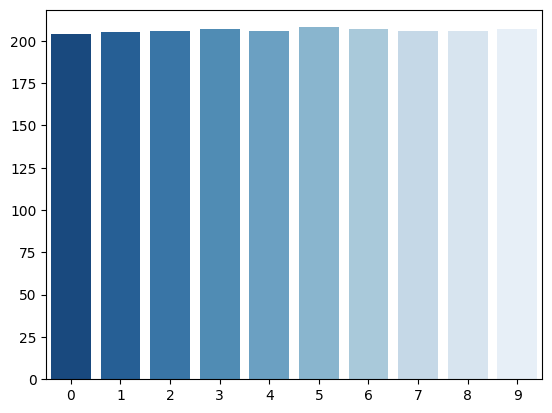

In [126]:
#checking if classes are balanced
cla_num = pd.Series(y).value_counts()
sns.barplot(x = cla_num.index, y = cla_num.values, palette = 'Blues_r')

In [11]:
#shape of X(input) and y(label)
X.shape, y.shape

((2062, 64, 64), (2062,))

In [12]:
#splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

In [14]:
#building the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, AveragePooling2D, Flatten
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu', input_shape = (64,64,1)))
model.add(AveragePooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        416       
                                                                 
 average_pooling2d_2 (Averag  (None, 30, 30, 16)       0         
 ePooling2D)                                                     
                                                                 
 dropout (Dropout)           (None, 30, 30, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        12832     
                                                                 
 average_pooling2d_3 (Averag  (None, 13, 13, 32)       0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)       

In [15]:
#compiling and fitting the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history1 = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
42/42 [==============================] - 6s 106ms/step - loss: 2.2958 - accuracy: 0.1281 - val_loss: 2.2425 - val_accuracy: 0.1636
Epoch 2/100
42/42 [==============================] - 4s 100ms/step - loss: 1.9701 - accuracy: 0.3275 - val_loss: 1.5117 - val_accuracy: 0.5061
Epoch 3/100
42/42 [==============================] - 4s 103ms/step - loss: 1.3250 - accuracy: 0.5572 - val_loss: 1.0963 - val_accuracy: 0.6030
Epoch 4/100
42/42 [==============================] - 4s 102ms/step - loss: 1.0261 - accuracy: 0.6755 - val_loss: 0.9026 - val_accuracy: 0.7242
Epoch 5/100
42/42 [==============================] - 4s 102ms/step - loss: 0.7766 - accuracy: 0.7627 - val_loss: 0.7068 - val_accuracy: 0.8121
Epoch 6/100
42/42 [==============================] - 4s 105ms/step - loss: 0.6096 - accuracy: 0.8188 - val_loss: 0.6234 - val_accuracy: 0.8242
Epoch 7/100
42/42 [==============================] - 4s 103ms/step - loss: 0.5371 - accuracy: 0.8355 - val_loss: 0.5833 - val_accuracy: 0.8152

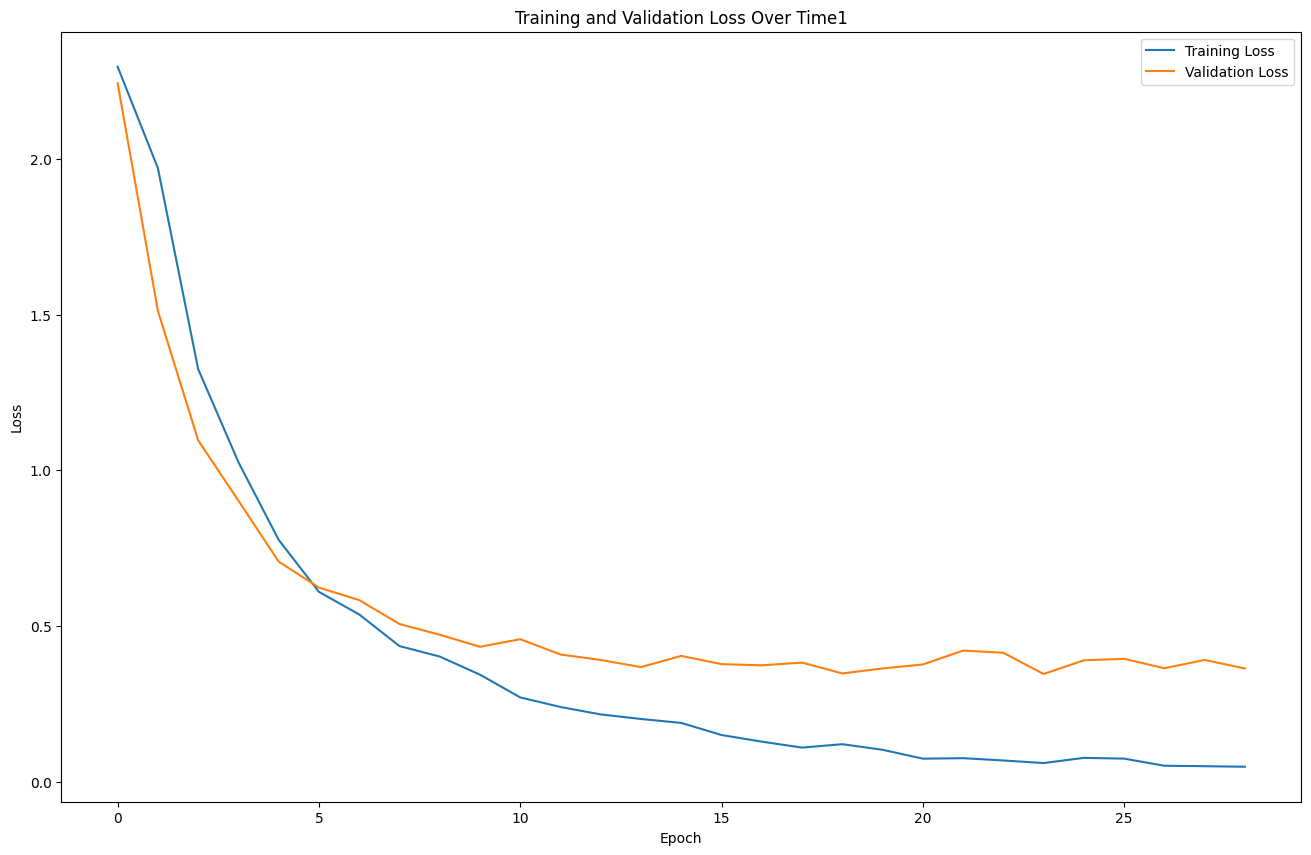

In [127]:
#plotting loss and accuracy by epoch
plt.figure(figsize=(16, 10))

epochs_range = range(len(history1.history['loss']))

plt.plot(epochs_range, history1.history['loss'], label="Training Loss")
plt.plot(epochs_range, history1.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time1")
plt.show()

In [20]:
#plotting confusion matris to show accuracy of model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

13/13 [==============================] - 0s 25ms/step
Test Loss: 0.31317
Test Accuracy: 91.28%


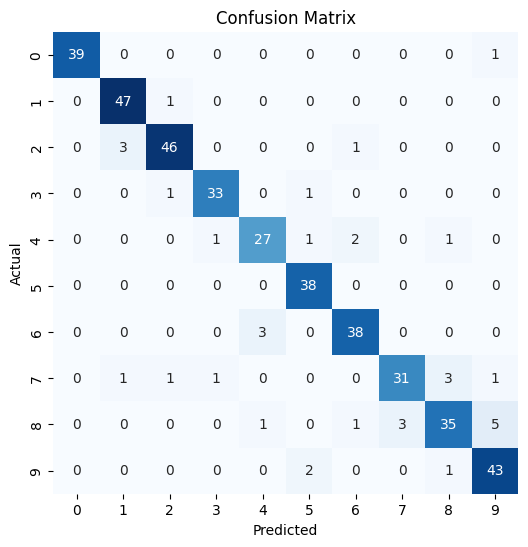

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.92      0.98      0.95        48
           2       0.94      0.92      0.93        50
           3       0.94      0.94      0.94        35
           4       0.87      0.84      0.86        32
           5       0.90      1.00      0.95        38
           6       0.90      0.93      0.92        41
           7       0.91      0.82      0.86        38
           8       0.88      0.78      0.82        45
           9       0.86      0.93      0.90        46

    accuracy                           0.91       413
   macro avg       0.91      0.91      0.91       413
weighted avg       0.91      0.91      0.91       413



In [21]:
evaluate_model(model, X_test, y_test)

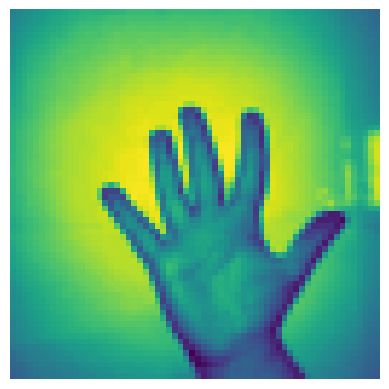

In [138]:
import random
idx = random.randint(0, len(y_test))
plt.imshow(X_test[idx, :])
plt.axis('off')
plt.show()

In [139]:
np.argmax(model.predict(X_test[idx, :].reshape(1, 64,64,1)))

1/1 [==============================] - 0s 25ms/step


5

In [45]:
#model.save("sign_languagegood.model", save_format="h5")

In [91]:
file2 = r"C:\Users\MASTER\Downloads\sign5.png"

In [101]:
def process_input(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))
    img_array = np.array(img)
    return img_array


In [135]:
def predict_class(img_array):
    ax =  plt.imshow(img_array)
    digit_class = np.argmax(model.predict(img_array.reshape(1, 64,64,1)))
    return digit_class, ax

1/1 [==============================] - 0s 33ms/step


(5, <matplotlib.image.AxesImage at 0x1cc31582210>)

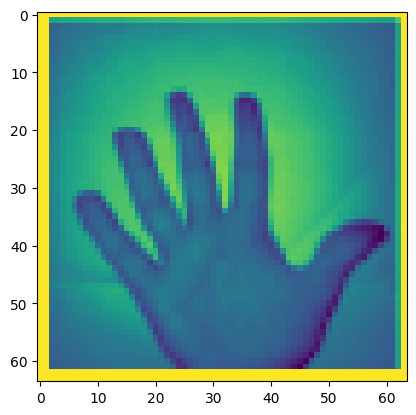

In [137]:
predict_class(process_input(file2))

